<a href="https://colab.research.google.com/github/Gauravjha2900/Charts_CNN_Based_MultiClassification/blob/main/GauravJha_ChartMulticlassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
!pip install tensorflow==2.4.1
!pip install keras==2.4.3
import tensorflow as tf
import os
import cv2
import numpy as np
from random import randint
import seaborn as sn
!pip install segmentation-models
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import RMSprop
from keras.layers import Activation, Dropout, Flatten, Dense, GlobalMaxPooling2D, Conv2D, MaxPooling2D
!pip install livelossplot==0.5.2
from livelossplot import PlotLossesKeras
from livelossplot.keras import PlotLossesCallback
from tensorflow.keras.layers import MaxPooling2D,Conv2D,Input,Add,MaxPool2D,Flatten,AveragePooling2D,Dense,BatchNormalization,ZeroPadding2D,Activation,Concatenate,UpSampling2D
from tensorflow.keras.models import Model


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 394.3 MB 14 kB/s 
     |████████████████████████████████| 132 kB 73.7 MB/s 
     |████████████████████████████████| 3.8 MB 31.2 MB/s 
     |████████████████████████████████| 2.9 MB 51.7 MB/s 
     |████████████████████████████████| 14.8 MB 57.1 MB/s 
     |████████████████████████████████| 462 kB 70.4 MB/s 
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=68720 sha256=96636d77ffacafc54a3996d46665506baf6b305682d5c9a1f688b533bc068113
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built wrapt
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.1.1
    Uninstalling typing-extensions-4.1.1:
      Successfully uninstalled typing-extensions-4.1.1
  Attempting uninstall: numpy
    Found existing installation: n

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 6.0 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive, files
drive.mount('/content/drive/')

Mounted at /content/drive/


##Check data
###Check the number of files in every chart class in folder /content/drive/MyDrive/chart_dataset/train. Images are already divided into train (1000 images) and test (50 images) data. Each class in train set contains 200 images.

create list CLASSES which contains the names of 5 classes of chart_dataset` based on folders names;

In [3]:
CLASSES, charts = [], [] # names of classes, count of images for each class

for root, dirs, files in os.walk('/content/drive/MyDrive/chart_dataset/train'):
    f = os.path.basename(root)    # get class name - pie, line, etc.,    
        
    if len(files) > 0:
        charts.append(len(files))
        if f not in CLASSES:
            CLASSES.append(f) # add folder name
    
    # uncomment this block if you want a text output about each subfolder
    #count_dirs = 0
    #for f in dirs:           # count subfolders
        #count_dirs += 1
    #depth = root.split(os.sep)
    #print((len(depth) - 2) * '--'+'>', '{}:\t {} folders, {} imgs'.format(os.path.basename(root), count_dirs, gems[-1] if gems!=[] else 0)) 
    
charts_count = len(CLASSES) # 5 = number of classes
print('{} classes with {} images in total'.format(len(CLASSES), sum(charts)))

5 classes with 1000 images in total


##Create function which reads images and class names


*   create a list of class names while reading folders - pie, line, etc;
*   read Images list is ready - convert it to Numpy array;
*   return tuple of 2 elements: Images and corresponding Labels.







In [4]:
def read_imgs_lbls(_dir):
    Images, Labels = [], []
    for root, dirs, files in os.walk(_dir):
        f = os.path.basename(root)  # get class name        
        for file in files:
            Labels.append(f)
            image = cv2.imread(root+'/'+file)              
            Images.append(image)
    Images = np.array(Images)
    return (Images, Labels)

##Create function which converts string labels to numbers


*   Convert string labels to a list of numbers using list CLASSES. The index will represent label of class, f.e. Pie = 3, line = 4, etc.
*   when Labels list is ready - convert it to Numpy array





In [5]:
def get_class_index(Labels):
    for i, n in enumerate(Labels):
        for j, k in enumerate(CLASSES):    # foreach CLASSES
            if n == k:
                Labels[i] = j
    Labels = np.array(Labels)
    return Labels

##Fill arrays of Images and corresponding Labels with data


*   Create two arrays Train_Imgs, Train_Lbls which contain images and corresponding names of classes of charts respectively;
*   Convert Train_Lbls with strings to list with corresponding numbers;
*   print the dimensions of both numpy arrays: Train_Imgs which stores pictures is 4-dimensional: **Number of images x Width of image x Height of image x Channel of image**.





In [6]:
Train_Imgs, Train_Lbls = read_imgs_lbls("/content/drive/MyDrive/chart_dataset/train")
Train_Lbls = get_class_index(Train_Lbls)
print('Shape of train images: {}'.format(Train_Imgs.shape))
print('Shape of train labels: {}'.format(Train_Lbls.shape))

Shape of train images: (1000, 128, 128, 3)
Shape of train labels: (1000,)


##Plot images and their labels for preview


*   Using matplotlib and random show 16 (4x4) random images from the set and their labels (as string and as int number).





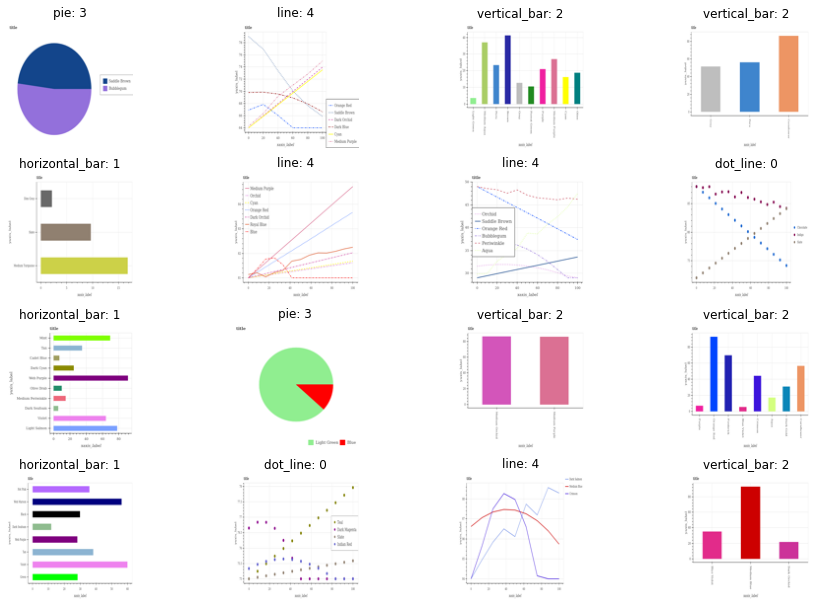

In [7]:
dim = 4 #  4x4 dimension flat plot
f,ax = plt.subplots(dim,dim) 
f.subplots_adjust(0,0,2,2)
for i in range(0,dim):
    for j in range(0,dim):
        rnd_number = randint(0,len(Train_Imgs))
        cl = Train_Lbls[rnd_number]
        ax[i,j].imshow(Train_Imgs[rnd_number])
        ax[i,j].set_title(CLASSES[cl]+': ' + str(cl))
        ax[i,j].axis('off')

#Task 1
##Use the train and Val images for training and validation in an appropriate ratio (e.g., 80% for training and 20 % for validating).

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(Train_Imgs, Train_Lbls, shuffle = True, test_size = 0.2, random_state = 42)
print('Shape of X_train: {}, y_train: {} '.format(X_train.shape, y_train.shape))
print('Shape of X_val: {}, y_val: {} '.format(X_val.shape, y_val.shape))

Shape of X_train: (800, 128, 128, 3), y_train: (800,) 
Shape of X_val: (200, 128, 128, 3), y_val: (200,) 


In [9]:
from tensorflow.python.client import device_lib
devices = device_lib.list_local_devices()
print(devices)

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 879376608094563735
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 15683598464
locality {
  bus_id: 1
  links {
  }
}
incarnation: 6709393778564021525
physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"
]


Build a simple CNN
CNN (Convolutional neural network or ConvNet) is a class of deep neural networks, commonly applied to analyzing visual imagery. Here is the simpliest example of CNN with few layers using Conv2D - 2D convolution layer (spatial convolution over images) and MaxPooling2D - application of a moving window across a 2D input space.

I. Provide Hyperparameters
Hyperparameters are set before training; they represent the variables which determines the neural network structure and how the it is trained.

1. Parameters for layers

*   Convolutional layer filter size (filters). The number of filters should depend on the complexity of dataset and the depth of neural network. A common setting to start with is [32, 64, 128] for three layers. 
*   kernel_size = number of filters = a small window of pixels at a time (3×3) which will be moved until the entire image is scanned. If images are smaller than 128×128, work with smaller filters of 1×1;
*   Width and Height of images were already provided. 2D convolutional layers take a three-dimensional input, typically an image with three color channels;
*   max_pool = max pooling is the application of a moving window across a 2D input space, where the maximum value within that window is the output: 2x2.



In [30]:
# Hyperparams
IMAGE_SIZE = 128
IMAGE_WIDTH, IMAGE_HEIGHT = IMAGE_SIZE, IMAGE_SIZE
BATCH_SIZE = 32
input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, 3)

#Task 2
##Implement a two-layer Convolutional Neural Network, and calculate accuracy, loss and plot the obtained loss. Briefly write your observation and submit your code so that we can evaluate your implementation at our end.

##Architect a model
1.   ADD 2 'blocks':

  *   Conv2D with hypermarameters mantioned above: Conv2D(kernel_size, (filters, filters), input_shape=(img_w, img_h, 3)) with activation function for each layer as a Rectified Linear Unit (ReLU): Activation('relu')
  *   MaxPooling2D layer to reduce the spatial size of the incoming features; 2D input space: MaxPooling2D(pool_size=(max_pool, max_pool))
2.   Flatten the input: transform the multidimensional vector into a single dimensional vector: Flatten()
3. Add dropout layer which randomly sets a certain fraction of its input to 0 and helps to reduce overfitting: Dropout(0.5)
4. Add fully connected layer with 128 nodes and activation function relu: Dense(128), Activation('relu')
5. Provide last fully connected layer which specifies the number of classes of charts: 5. Softmax activation function outputs a vector that represents the probability distributions of a list of potential outcomes: Dense(5, activation='softmax')
6. Print the summary of the model.









In [31]:
model = Sequential()

# first layer
model.add(Conv2D(BATCH_SIZE, (3,3), activation='relu', padding='same', input_shape=input_shape)) # 32
model.add(MaxPooling2D((2, 2))) #reduce the spatial size of incoming features

model.add(Dropout(0.5))
# second layer
model.add(Conv2D(BATCH_SIZE, (3,3), activation='relu', padding='same')) # 32
model.add(MaxPooling2D((3,3))) 

model.add(Flatten())
model.add(Dense(4*BATCH_SIZE, activation='relu'))                                             # 128
model.add(Dense(5, kernel_regularizer=tf.keras.regularizers.l2(0.001),activation
             ='softmax'))

The model summary shows that there are more than 2M parameters to train and the information about different layers.

In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 21, 21, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 14112)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)              

Compile the model using adam optimizer which is a generalization of stochastic gradient descent (SGD) algo. Provided loss function is sparse_categorical_crossentropy as we are doing multiclass classification.

In [33]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [34]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

val_datagen = ImageDataGenerator(rescale=1./255)

In [35]:
train_gen = train_datagen.flow(X_train, y_train, batch_size=BATCH_SIZE)
val_gen = val_datagen.flow(X_val, y_val, batch_size=BATCH_SIZE)

In [36]:
m = model.fit_generator(
       train_gen,
       epochs=9, 
       validation_data = val_gen,
       verbose = 1
       )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/9
25/25 [==============================] - 3s 112ms/step - loss: 4.4923 - accuracy: 0.2147 - val_loss: 1.6180 - val_accuracy: 0.2000
Epoch 2/9
25/25 [==============================] - 3s 106ms/step - loss: 1.6088 - accuracy: 0.2479 - val_loss: 1.6129 - val_accuracy: 0.3500
Epoch 3/9
25/25 [==============================] - 3s 107ms/step - loss: 1.4913 - accuracy: 0.4474 - val_loss: 1.3262 - val_accuracy: 0.5050
Epoch 4/9
25/25 [==============================] - 3s 107ms/step - loss: 1.0153 - accuracy: 0.5384 - val_loss: 0.9937 - val_accuracy: 0.5700
Epoch 5/9
25/25 [==============================] - 3s 107ms/step - loss: 0.7305 - accuracy: 0.6734 - val_loss: 0.7703 - val_accuracy: 0.8100
Epoch 6/9
25/25 [==============================] - 3s 107ms/step - loss: 0.5581 - accuracy: 0.7198 - val_loss: 0.5517 - val_accuracy: 0.8650
Epoch 7/9
25/25 [==============================] - 3s 108ms/step - loss: 0.3878 - accuracy: 0.8225 - val_loss: 0.4884 - val_accuracy: 0.8100
Epoch 8/9
25/

##Check the accuracy and loss

*  plot the accuracy of model against size of epoch (train and val)
*  plot the loss of model against size of epoch (train and val)




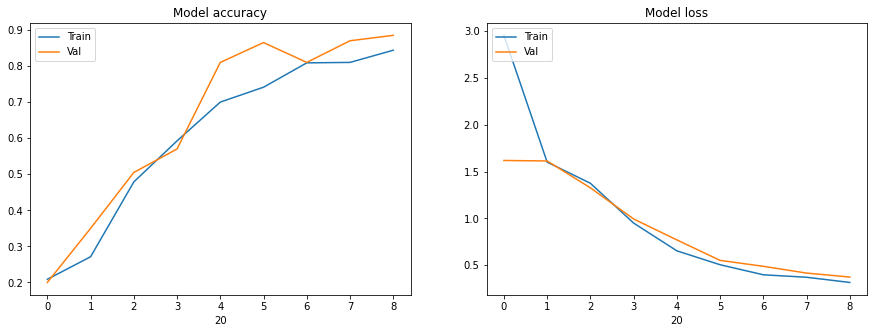

In [37]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
axs[0].plot(m.history['accuracy'])
axs[0].plot(m.history['val_accuracy'])
axs[0].set_title('Model accuracy')
axs[0].legend(['Train', 'Val'], loc='upper left')

axs[1].plot(m.history['loss'])
axs[1].plot(m.history['val_loss'])
axs[1].set_title('Model loss')
axs[1].legend(['Train', 'Val'], loc='upper left')

for ax in axs.flat:
    ax.set(xlabel='20')

##Score the model

Accuracy is a metric for evaluating classification models. Accuracy  = Number of right predictions / Total number of predictions.
*   Function evaluate_generator evaluates the model on a data generator: score is a list of scalars (loss and accuracy).




In [38]:
score = model.evaluate_generator(val_gen, steps= len(val_gen))

for idx, metric in enumerate(model.metrics_names):
    print('{}:{}'.format(metric, score[idx]))

loss:0.37391433119773865
accuracy:0.8849999904632568


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


##Confusion Matrix plot

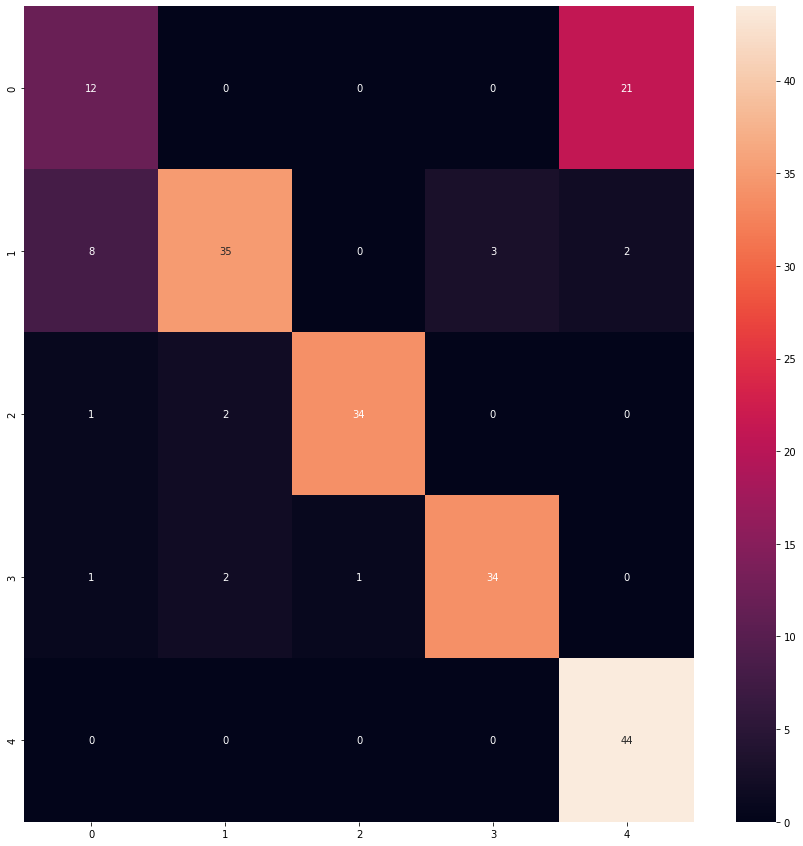

In [39]:
from sklearn.metrics import confusion_matrix
y_pre_test=model.predict(X_val)
y_pre_test=np.argmax(y_pre_test,axis=1)
cm=confusion_matrix(y_val,y_pre_test)

plt.figure(figsize = (15,15))
sn.heatmap(cm, annot=True)

# dot_line=0
# horizontal_bar=1
# vertical_bar=2
# pie=3
# line=4

In [40]:
model.save('model_charts.h5')

In [42]:
from tensorflow.keras.models import load_model
 
model = load_model('model_charts.h5')

In [43]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 21, 21, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 14112)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)              